<a href="https://colab.research.google.com/github/Ravikumarsivalinga/-_-/blob/main/Major_project_final_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import time

# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Load the dataset
data = pd.read_csv("/content/final_medical_data.csv")



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Define medical advice dictionary
medical_conditions = {
    'flu': 'For flu, rest and hydration are essential. Consider over-the-counter medications for fever and discomfort.',
    'cold': 'For a cold, stay hydrated and use decongestants. Rest is also important.',
    'headache': 'Headaches can be treated with pain relievers and rest. If persistent, consult a healthcare provider.',
    'diabetes': 'Manage diabetes with a balanced diet, regular exercise, and medication as prescribed by your doctor.',
    'hypertension': 'Monitor blood pressure, reduce salt intake, and follow prescribed medications.',
    'asthma': 'Use prescribed inhalers and avoid triggers. Regular check-ups are important.',
    'back pain': 'Rest, proper posture, and physical therapy can help. Consult a specialist if pain persists.',
    'allergy': 'Identify and avoid allergens. Over-the-counter antihistamines can help alleviate symptoms.',
    'infection': 'Follow prescribed antibiotics and complete the full course. Rest and hydration are important.',
    'anxiety': 'Practice relaxation techniques and seek therapy. Medication may be prescribed by a doctor.',
    'depression': 'Consult a mental health professional. Therapy, lifestyle changes, and medication can help.',
    'arthritis': 'Manage arthritis with anti-inflammatory medications, physical therapy, and joint care.',
    'migraine': 'Avoid triggers, use pain relievers, and rest in a dark, quiet room. Consult a specialist for chronic migraines.',
    'heart disease': 'Follow a heart-healthy diet, exercise regularly, and take prescribed medications.',
    'obesity': 'Adopt a healthy diet, increase physical activity, and consider medical interventions if necessary.',
    'stroke': 'Emergency treatment is critical. Rehabilitation and lifestyle changes can aid recovery and prevention.',
    'chronic fatigue syndrome': 'Manage symptoms with a balanced routine, rest, and stress reduction techniques.',
    'gastroesophageal reflux disease (gerd)': 'Avoid trigger foods, eat smaller meals, and consider medications for acid reduction.',
    'irritable bowel syndrome (ibs)': 'Manage IBS with dietary changes, stress management, and prescribed medications.',
    'skin rash': 'Use topical creams and avoid irritants. Consult a dermatologist if the rash persists.',
    'insomnia': 'Establish a regular sleep schedule, avoid caffeine, and seek medical advice for chronic insomnia.',
    'osteoporosis': 'Ensure adequate calcium and vitamin D intake, and engage in weight-bearing exercises. Medications may be required.',
    'kidney stones': 'Stay hydrated and follow a low-sodium diet. Pain management and medical intervention may be necessary.',
    'eczema': 'Moisturize regularly and use prescribed creams. Avoid irritants and allergens.',
    'psoriasis': 'Use prescribed topical treatments and avoid triggers like stress. Consult a dermatologist for severe cases.',
    'pneumonia': 'Take prescribed antibiotics, rest, and stay hydrated. Hospitalization may be needed in severe cases.',
    'anemia': 'Treat anemia with iron supplements and a balanced diet. Seek medical advice for underlying causes.',
    'hypothyroidism': 'Take prescribed thyroid hormone replacement and have regular blood tests to monitor levels.',
    'parkinson’s disease': 'Manage symptoms with medication, physical therapy, and regular doctor visits.'
}

# Clean and preprocess the data
data = data.iloc[:, :7]
data.dropna(inplace=True)
data.columns = data.columns.str.strip()  # Remove any extra spaces from column names
data.rename(columns={'Medical condition': 'Medical_condition'}, inplace=True)
data['Medical_condition'] = data['Medical_condition'].str.lower()

# Encode labels
label_encoder = LabelEncoder()
data['Condition_Label'] = label_encoder.fit_transform(data['Medical_condition'])

# Preprocess conditions for NLP
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    return ' '.join([word for word in tokens if word.isalpha() and word not in stop_words])

data['Processed_Condition'] = data['Medical_condition'].apply(preprocess_text)

# Tokenization and padding
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(data['Processed_Condition'])
sequences = tokenizer.texts_to_sequences(data['Processed_Condition'])
padded_sequences = pad_sequences(sequences, maxlen=10)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, data['Condition_Label'], test_size=0.2, random_state=42)
num_classes = len(data['Condition_Label'].unique())

# Build the NLP model
model = Sequential([
    Embedding(5000, 128, input_length=10),
    LSTM(128, dropout=0.2, recurrent_dropout=0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_test, y_test))




/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.0831 - loss: 3.2815 - val_accuracy: 0.5750 - val_loss: 1.9468
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7306 - loss: 1.2597 - val_accuracy: 1.0000 - val_loss: 0.0871
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9988 - loss: 0.1235 - val_accuracy: 1.0000 - val_loss: 0.0124
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.9995 - loss: 0.0432 - val_accuracy: 1.0000 - val_loss: 0.0039
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 1.0000 - loss: 0.0246 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9989 - loss: 0.0164 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9994 - loss: 0.0094 - val_accuracy: 1.0000 - val_loss: 6.1892e-04
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 1.0000 - loss: 0.0060 - val_

In [ ]:
# Save a DataFrame to track patient records
df = data.copy()

# Function to get medical advice based on condition
def get_advice(condition):
    condition = condition.lower()  # Ensure condition is lowercase for matching
    return medical_conditions.get(condition, "Consult your doctor for further assistance.")

# Main loop for user interaction
total_queries = 0
correct_predictions = 0
total_response_time = 0.0

while True:
    print("\nPlease choose an option:")
    print("1. Get medical advice")
    print("2. Schedule an appointment")
    print("3. Manage patient records")
    print("4. Exit")
    choice = input("Enter your choice (1/2/3/4): ")

    if choice == '1':
        user_input = input("Enter your medical condition or symptoms: ")

        start_time = time.time()  # Start timing for response time

        # Preprocess user input
        processed_input = preprocess_text(user_input)
        input_seq = tokenizer.texts_to_sequences([processed_input])
        input_padded = pad_sequences(input_seq, maxlen=10)

        # Predict the condition label
        predicted_label = np.argmax(model.predict(input_padded), axis=-1)
        predicted_condition = label_encoder.inverse_transform(predicted_label)[0]

        # Display the predicted condition and the advice
        print(f"Predicted Condition: {predicted_condition.capitalize()}")
        print("Advice:", get_advice(predicted_condition))

        end_time = time.time()  # End timing
        total_queries += 1
        total_response_time += (end_time - start_time)

    elif choice == '2':
        # Scheduling an appointment
        name = input("Enter patient name: ")
        age = int(input("Enter the age: "))
        gender = input("Enter the gender of the patient: ")
        doctor = input("Enter doctor's name: ")
        appointment_time = input("Enter appointment time (HH:MM:AM/PM): ")
        date_of_admission = input("Enter date of admission (YYYY-MM-DD): ")
        medical_condition = input("Enter the medical condition: ")

        # Add appointment to DataFrame
        df1 = df.copy()  # Make sure to copy df to df1
        df1=df1.iloc[:,:7]
        df1.loc[len(df1)] = [name, age, gender, doctor, appointment_time, date_of_admission, medical_condition]
        print(f"Appointment scheduled for {name} with Dr. {doctor} on {date_of_admission} at {appointment_time}.")

    elif choice == '3':
        # Simple record management
        name = input("Enter patient name to find records: ")
        records = df1[df1['Name'].str.lower() == name.lower()]
        if not records.empty:
            print(records)
        else:
            print("No records found for this name.")

    elif choice == '4':
        print("Exiting the assistant.")
        if total_queries > 0:
            # Calculate total accuracy before exiting
            total_accuracy = (correct_predictions / total_queries) * 100
            print(f"Total Accuracy of the Model: {total_accuracy:.2f}%")

            # Calculate average response time
            avg_response_time = total_response_time / total_queries
            print(f"Average Response Time: {avg_response_time:.4f} seconds")
        else:
            print("No queries were made, so no accuracy can be calculated.")
        print("Have a great day!")
        break

    else:
        print("Invalid choice, please enter a number between 1 and 4.")


Please choose an option:
1. Get medical advice
2. Schedule an appointment
3. Manage patient records
4. Exit
Enter your choice (1/2/3/4): 1
Enter your medical condition or symptoms: flu


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
Predicted Condition: Flu
Advice: For flu, rest and hydration are essential. Consider over-the-counter medications for fever and discomfort.

Please choose an option:
1. Get medical advice
2. Schedule an appointment
3. Manage patient records
4. Exit
Enter your choice (1/2/3/4): 4
Exiting the assistant.
Total Accuracy of the Model: 0.00%
Average Response Time: 0.3780 seconds
Have a great day!


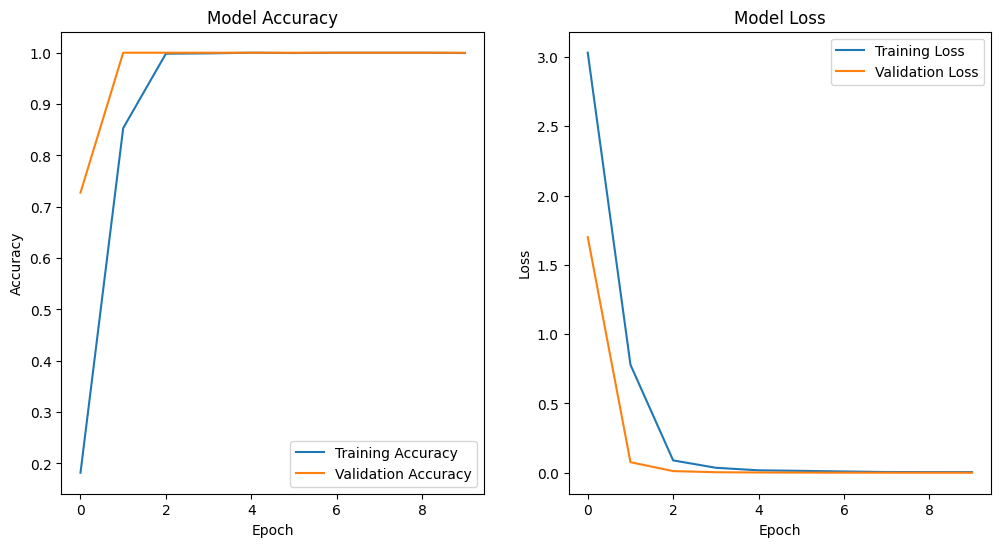

In [ ]:
# Plot accuracy and loss graphs
plt.figure(figsize=(12, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


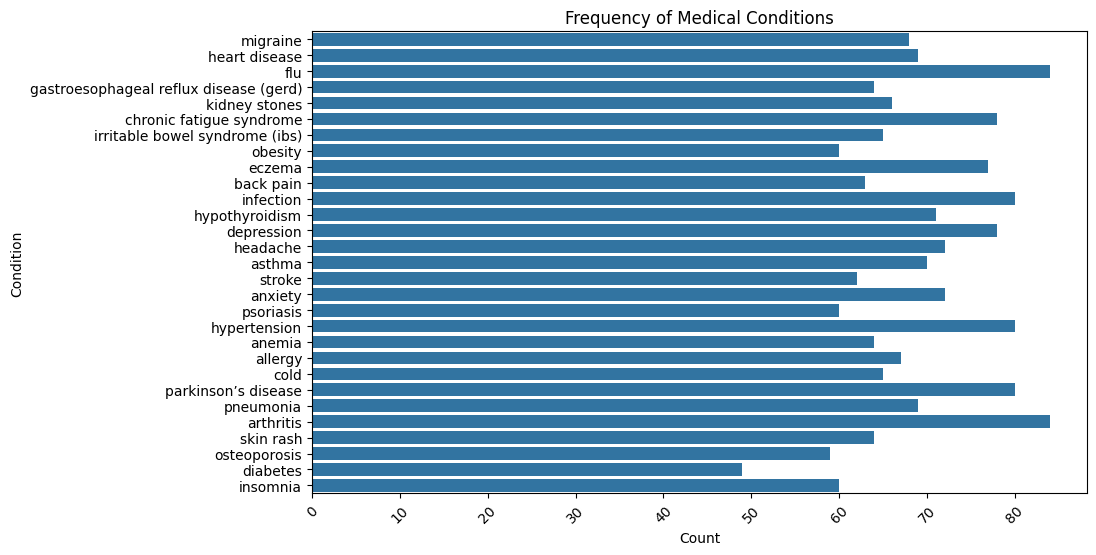

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data['Medical_condition'])
plt.xticks(rotation=45)
plt.title("Frequency of Medical Conditions")
plt.xlabel("Count")
plt.ylabel("Condition")
plt.show()


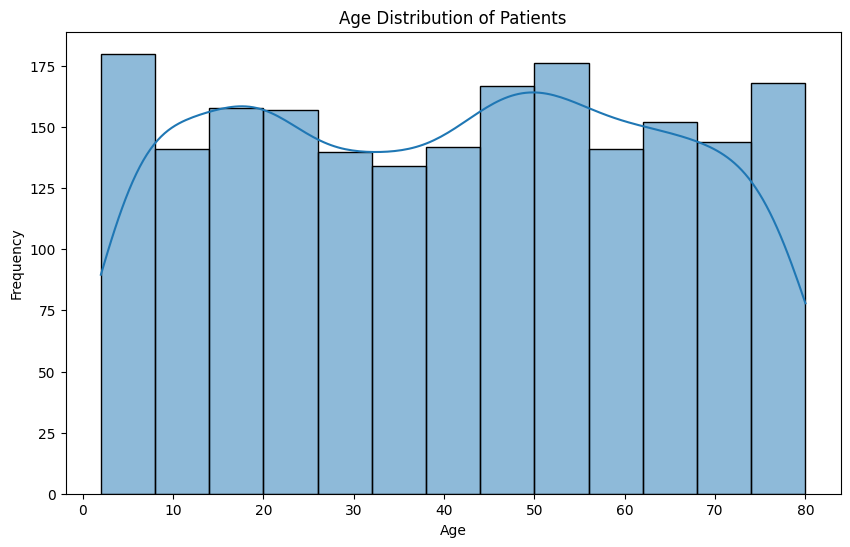

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], kde=True)
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


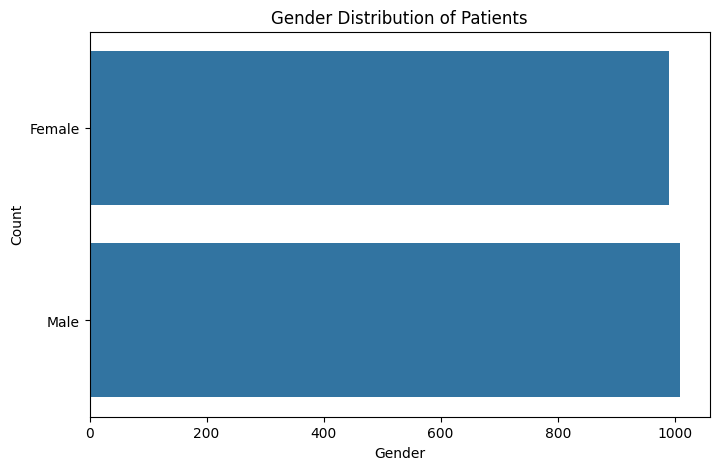

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data['Gender'])
plt.title("Gender Distribution of Patients")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


<ipython-input-42-08c691f855fc>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Appointment_hour'] = pd.to_datetime(data['Appointment time']).dt.hour


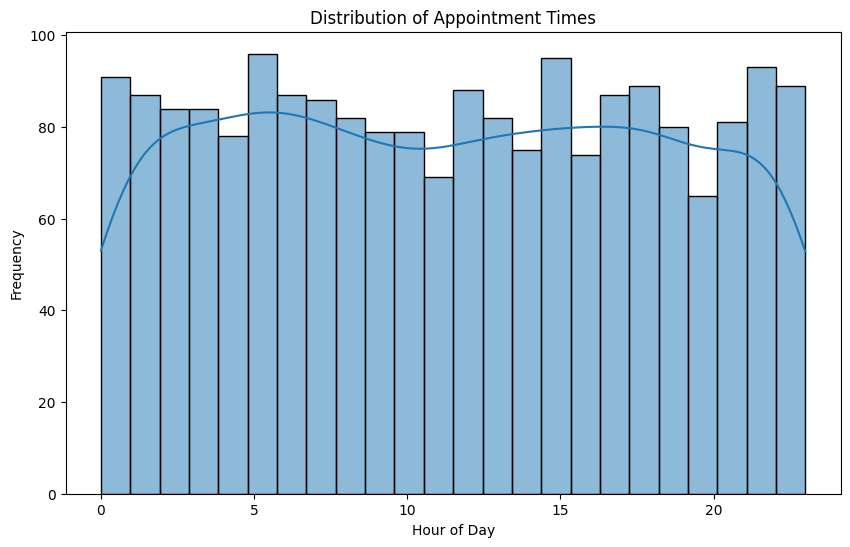

In [ ]:
data['Appointment_hour'] = pd.to_datetime(data['Appointment time']).dt.hour
plt.figure(figsize=(10, 6))
sns.histplot(data['Appointment_hour'], bins=24, kde=True)
plt.title("Distribution of Appointment Times")
plt.xlabel("Hour of Day")
plt.ylabel("Frequency")
plt.show()


<ipython-input-43-d92ea34e3d45>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Appointment_hour'] = pd.to_datetime(data['Appointment time']).dt.hour


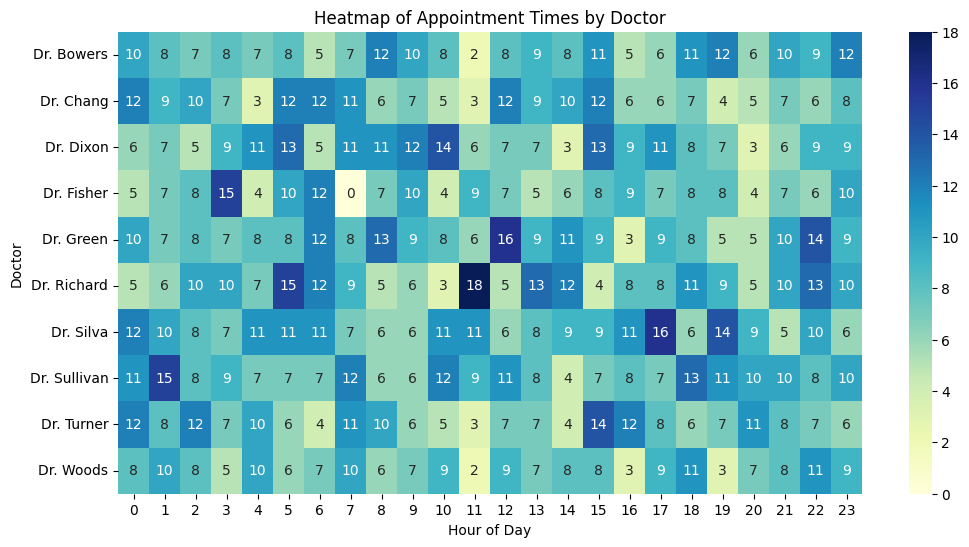

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract hour and doctor columns for the heatmap
data['Appointment_hour'] = pd.to_datetime(data['Appointment time']).dt.hour

# Pivot table to get the count of appointments per hour for each doctor
appointment_heatmap_data = data.pivot_table(index='Doctor', columns='Appointment_hour', aggfunc='size', fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(appointment_heatmap_data, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Heatmap of Appointment Times by Doctor")
plt.xlabel("Hour of Day")
plt.ylabel("Doctor")
plt.show()


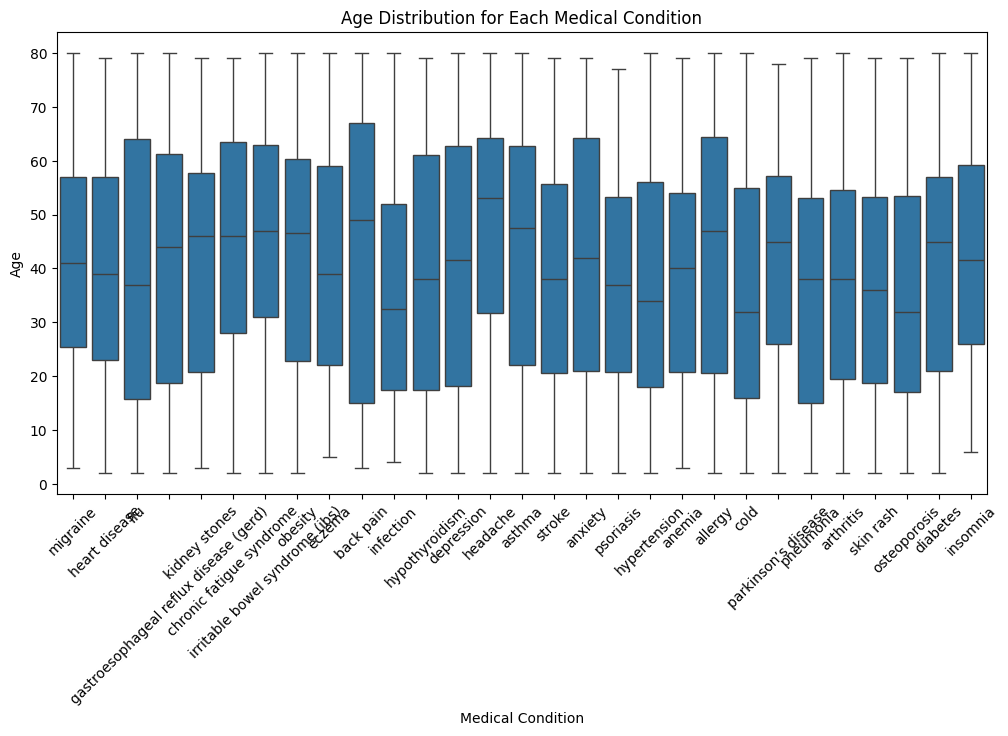

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Medical_condition', y='Age', data=data)
plt.xticks(rotation=45)
plt.title("Age Distribution for Each Medical Condition")
plt.xlabel("Medical Condition")
plt.ylabel("Age")
plt.show()


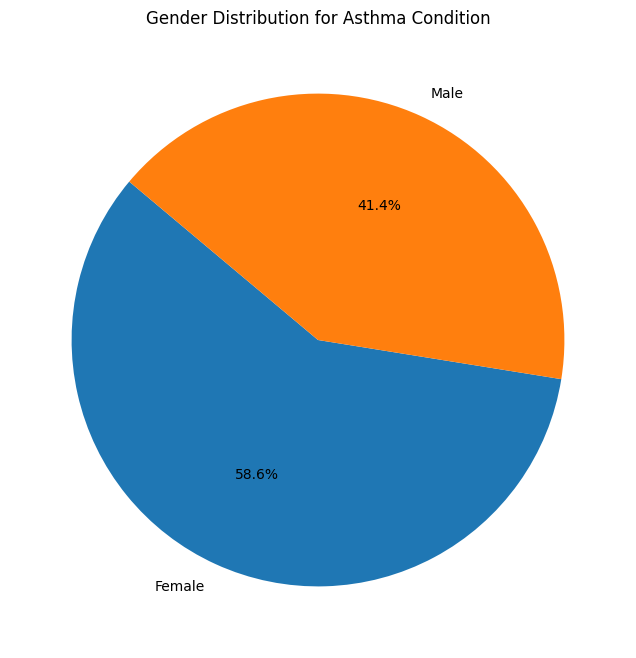

In [ ]:
# Filter data for a specific condition, e.g., "Asthma"
condition_data = data[data['Medical_condition'] == 'asthma']
gender_counts = condition_data['Gender'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Gender Distribution for Asthma Condition")
plt.show()


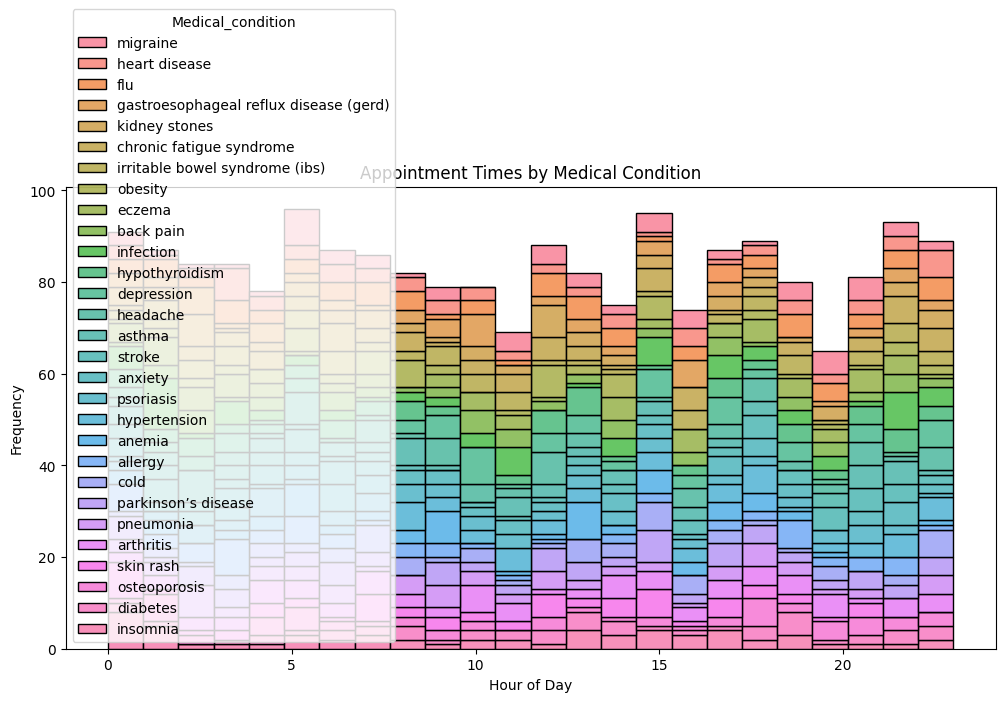

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='Appointment_hour', hue='Medical_condition', multiple='stack', bins=24)
plt.title("Appointment Times by Medical Condition")
plt.xlabel("Hour of Day")
plt.ylabel("Frequency")
plt.show()


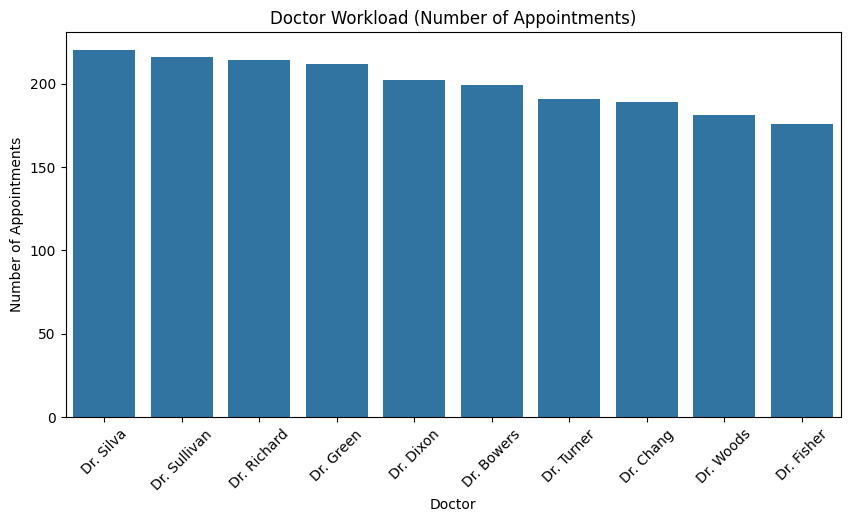

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='Doctor', order=data['Doctor'].value_counts().index)
plt.title("Doctor Workload (Number of Appointments)")
plt.xlabel("Doctor")
plt.ylabel("Number of Appointments")
plt.xticks(rotation=45)
plt.show()


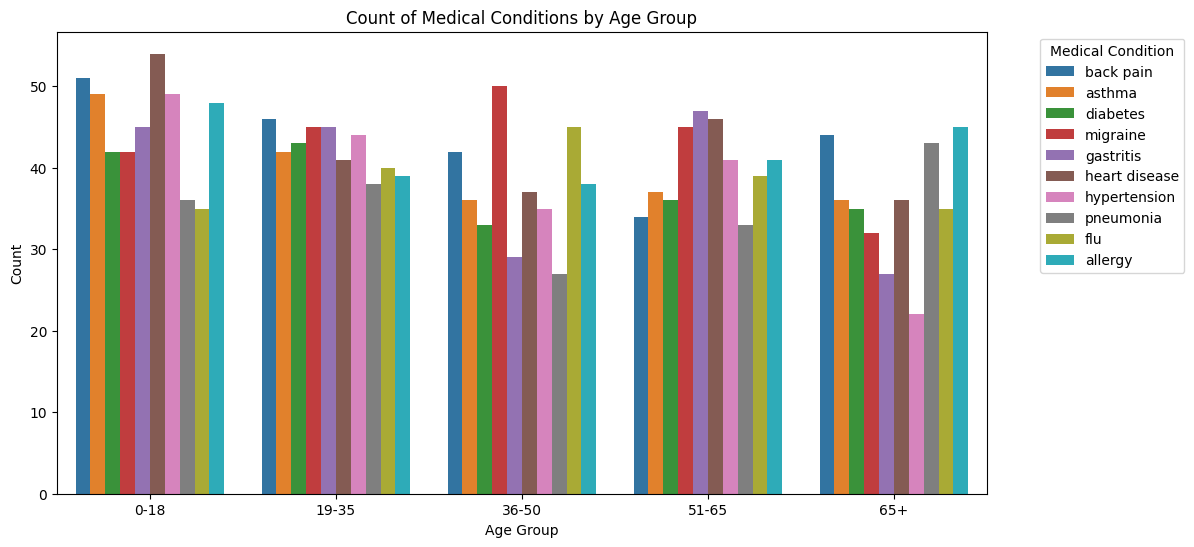

In [ ]:
# Define age groups
bins = [0, 18, 35, 50, 65, 100]
labels = ['0-18', '19-35', '36-50', '51-65', '65+']
data['Age_Group'] = pd.cut(data['Age'], bins=bins, labels=labels)

plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Age_Group', hue='Medical_condition')
plt.title("Count of Medical Conditions by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(title="Medical Condition", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
